<a href="https://colab.research.google.com/github/hruthiksiva/KaggleComp-IIIT-Delhi/blob/main/kaggle_iiit_round2-v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import nltk
nltk.download('stopwords')
!pip install shorttext
!pip install pyenchant
!pip install unidecode contractions
#!spacy download en_core_web_sm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
import pandas as pd
import numpy as np
import random
import re
import time 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unidecode
import contractions
from string import punctuation
import spacy
from sklearn.preprocessing import LabelEncoder

nlp = spacy.load('en_core_web_sm')

In [203]:
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.utils import to_categorical

In [204]:
!ls
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
sub= pd.read_csv('submission_format.csv')


cleaned_train.csv  submission_format.csv  test.csv
sample_data	   Termi.csv		  train.csv


# **Visualize Data**

In [205]:
train.head()

,id,content,type
0,1694628490,@avataraang awww ) where'd you get that? hugh ...,surprise
1,1751142947,@mistressmia Their is no such thing as TRANSPA...,enthusiasm
2,1695004607,"@Dojie wouldn't that cost quite a bit, I mean ...",fun
3,1752918270,Eminem's new song &quot;Beautiful&quot; is ama...,surprise
4,1751176554,"@AmyriadfthINGs Yeah, I've never seen that! Bu...",surprise


In [206]:
train.columns

Index(['id', 'content', 'type'], dtype='object')

In [207]:
test.head()

,id,content
0,1965378068,Dammit i just locked the keys in the car! had ...
1,1752444490,@xAnitaLx I'll do anything you like!!!!! Just ...
2,1753905153,going to watch boy in the striped pj's hope i ...
3,1752962276,It's Just So Audioo.
4,1752619727,@JamesProps very cute kitty


In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       30000 non-null  int64 
 1   content  30000 non-null  object
 2   type     30000 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


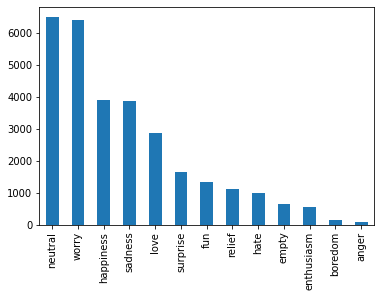

In [209]:
train.type.value_counts().plot(kind='bar')

# **Train and Test Data**

In [212]:
REPLACE = re.compile('[/(){}[]|@,;]')
STOPWORDS = set(stopwords.words('english'))-set(['no','not'])
def preprocess(text):
    #text = BeautifulSoup(text, "lxml").gettext(separator=' ',strip=True)
    text = text.lower()
    text = unidecode.unidecode(text)
    text=' '.join(word for word in text.split(' ') if not word.startswith('http'))
    text = ' '.join([word for word in text.split(' ') if not word.startswith('@')])
    text = REPLACE.sub(' ', text) ###
    text = ' '.join(contractions.fix(word) for word in text.split() if word not in STOPWORDS )
    text = ''.join(l for l in text if l not in punctuation if not l.isdigit())
    #text = ' '.join(spell(word) for word in text.split())
    sen  = nlp(text)
    #text = " ".join([word.lemma if word.lemma != "-PRON-" else word.lower for word in sen])
    return text.strip()

In [213]:
train['content']=train.content.apply(preprocess)

In [214]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(train.content)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train,X_test,Y_train,Y_test = train_test_split(X_train_tfidf,train.type,test_size=0.3,random_state=2020,shuffle=True)

In [ ]:
enc=LabelEncoder()
Y_train=enc.fit_transform(Y_train)
Y_train=to_categorical(Y_train, num_classes=13)

In [215]:
test['content']=test.content.apply(preprocess)

In [216]:
Y_train[0]

'surprise'

# **Model Selection**

## **Model1(SGD Gradient Descent)**

In [ ]:
SGDClassifier()

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [235]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [236]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_train), Y_train)*100)

SVM Accuracy Score: 79.43333333333334


In [237]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_test), Y_test)*100)

SVM Accuracy Score: 31.38888888888889


## **Model2(Naives Bayers)**

In [ ]:
MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [292]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [293]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_train), Y_train)*100)

SVM Accuracy Score: 45.65238095238095


In [294]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_test), Y_test)*100)

SVM Accuracy Score: 29.06666666666667


## Model3(GradientBoosting)

In [290]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train["type"].unique())
train["typelabel"]=le.transform(train["type"])

In [291]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
#model = GradientBoostingClassifier(max_depth=2,subsample=0.5,n_estimators=80,learning_rate=0.19,random_state=5)
model.fit(X_train,Y_train)

AttributeError: ignored

## Model4(SVM)

In [ ]:
from sklearn import svm
model= svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto') #soorya highest
#model=svm.SVC(kernel='sigmoid',random_state=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_train)

In [262]:
from sklearn.svm import LinearSVC
model=svm.LinearSVC()
#model=svm.SVC(kernel='sigmoid',random_state=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_train)

In [302]:
print("SVM Accuracy Score:", accuracy_score(Y_pred, Y_train)*100)

SVM Accuracy Score: 21.83809523809524


In [303]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_test), Y_test)*100)

SVM Accuracy Score: 21.08888888888889


## Model5(NN)

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=37957, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(13, activation='sigmoid'))

In [ ]:
model.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
Y_train[0]

'surprise'

In [ ]:

model.fit(X_train, Y_train, epochs=150, batch_size=64)

InvalidArgumentError: ignored

In [ ]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

##**Model6(XGBooster)**

In [277]:
from xgboost import XGBClassifier
#model = XGBClassifier()
model = XGBClassifier(max_depth=5,subsample=1,n_estimators=500,learning_rate=0.08,min_child_weight=2) 
model.fit(X_train, Y_train)
Y_pred=model.predict(X_train)

KeyboardInterrupt: ignored

In [272]:
print("SVM Accuracy Score:", accuracy_score(Y_pred, Y_train)*100)

SVM Accuracy Score: 43.49047619047619


In [273]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_test), Y_test)*100)

SVM Accuracy Score: 33.666666666666664


## **Model7(Adaboosting)**

In [260]:
!pip install AdaBoostClassifier

ERROR: Could not find a version that satisfies the requirement AdaBoostClassifier (from versions: none)
ERROR: No matching distribution found for AdaBoostClassifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#bmodel = DecisionTreeClassifier()
bmodel = DecisionTreeClassifier(criterion="entropy",max_depth=4)
#AdaBoost = AdaBoostClassifier(base_estimator=bmodel)
AdaBoost = AdaBoostClassifier(base_estimator=bmodel,n_estimators=20,learning_rate=0.09)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_train)

In [ ]:
np.mean(model.predict(X_train)==Y_train)

0.9251904761904762

## Model8(DecisionTree)

In [285]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [286]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,Y_train)
Y_pred=model.predict(X_train)

AttributeError: ignored

In [ ]:
print("SVM Accuracy Score:", accuracy_score(Y_pred, Y_train)*100)

SVM Accuracy Score: 42.53809523809524


In [ ]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_test), Y_test)*100)

SVM Accuracy Score: 33.48888888888889


## **Model9(RandomForest)**

In [287]:
from sklearn.ensemble import RandomForestClassifier

In [288]:
model=RandomForestClassifier()
#model=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=2)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_train)

AttributeError: ignored

## **Model10(LogisticRegression)**

In [270]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)
#model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("SVM Accuracy Score:", accuracy_score(Y_pred, Y_train)*100)

SVM Accuracy Score: 42.53809523809524


In [ ]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_test), Y_test)*100)

SVM Accuracy Score: 33.48888888888889


# **Score Check**

In [ ]:
test['content']=test.content.apply(preprocess)

In [298]:
X_test_counts = count_vect.transform(test.content)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [ ]:
print("SVM Accuracy Score:", accuracy_score(Y_pred, Y_train)*100)

In [299]:
print("SVM Accuracy Score:", accuracy_score(model.predict(X_test), Y_test)*100)

SVM Accuracy Score: 33.92222222222222


# **Submit File Creator**

In [274]:
sub.head()

,id,type
0,1965378068,happiness
1,1752444490,surprise
2,1753905153,enthusiasm
3,1752962276,hate
4,1752619727,neutral


In [276]:
result.head()

,id,type
0,1965378068,neutral
1,1752444490,neutral
2,1753905153,worry
3,1752962276,neutral
4,1752619727,love


In [300]:
result=pd.DataFrame(zip(test.id,model.predict(X_test_tfidf)),columns=['id','type'])
result.to_csv('Termi.csv',index=False,header=['id','type'])